In [1]:
from drift_agrawal import SubgroupAgrawalDrift

In [2]:
import numpy as np
deltas = []
for i in range(1000):
    frac = np.random.random()
    sda = SubgroupAgrawalDrift(sg_size=frac, position=0, width=10_000)
    deltas.append(abs(frac - sda.sg_size))

0.844


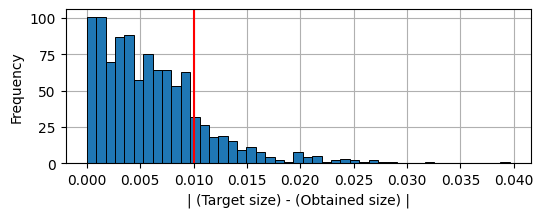

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 2))
ax.hist(deltas, bins=45, color='tab:blue', edgecolor='black', linewidth=0.7)
ax.axvline(1e-2, color='r')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('| (Target size) - (Obtained size) |')
ax.set_ylabel('Frequency')
print(sum([1 for d in deltas if d <= 1e-2]) / len(deltas))
fig.savefig("distrib-delta.pdf", bbox_inches='tight')

In [4]:
def get_actual(sda):
    is_drifting = []
    drifted = []
    for x,y,isd,d in sda.take(10_000, drift_info=True):
        is_drifting.append(isd)
        drifted.append(d)
    return sum(is_drifting) / len(is_drifting)

In [5]:
def format_sg(s):
    return " $\\land$ \\\\".join([f"{k} $\\in$ [{v[0]}, {v[1]})" for k,v in s.items() ])

In [6]:
sg_sizes = [ 0.05, 0.1, 0.25, 0.5]

rows = []
index = []

for sg_size in sg_sizes:
    sda = SubgroupAgrawalDrift(sg_size=sg_size, position=0, width=10_000)
    row = [round(sg_size, 4), round(sda.sg_size,4), round(get_actual(sda), 4)]
    rows.append(row)
    index.append(format_sg(sda.sg))


In [7]:
import pandas as pd

df = pd.DataFrame(rows, columns=['Target size', 'Computed size', 'Actual size'], index=index)

In [8]:
df

,Target size,Computed size,Actual size
"salary $\in$ [42000, 61000) $\land$ \\age $\in$ [34, 60) $\land$ \\loan $\in$ [15000, 455000)",0.05,0.0543,0.0556
"zipcode $\in$ [5, 6) $\land$ \\hyears $\in$ [1, 30)",0.10,0.1074,0.1043
"zipcode $\in$ [2, 8) $\land$ \\elevel $\in$ [0, 4) $\land$ \\car $\in$ [4, 20) $\land$ \\hyears $\in$ [10, 29) $\land$ \\age $\in$ [20, 77)",0.25,0.2525,0.2573
"loan $\in$ [22000, 376000) $\land$ \\elevel $\in$ [0, 4) $\land$ \\salary $\in$ [21000, 150000) $\land$ \\hyears $\in$ [2, 29)",0.50,0.5010,0.5116


In [9]:
print(df.to_latex(float_format="%.4f"))

\begin{tabular}{lrrr}
\toprule
 & Target size & Computed size & Actual size \\
\midrule
salary $\in$ [42000, 61000) $\land$ \\age $\in$ [34, 60) $\land$ \\loan $\in$ [15000, 455000) & 0.0500 & 0.0543 & 0.0556 \\
zipcode $\in$ [5, 6) $\land$ \\hyears $\in$ [1, 30) & 0.1000 & 0.1074 & 0.1043 \\
zipcode $\in$ [2, 8) $\land$ \\elevel $\in$ [0, 4) $\land$ \\car $\in$ [4, 20) $\land$ \\hyears $\in$ [10, 29) $\land$ \\age $\in$ [20, 77) & 0.2500 & 0.2525 & 0.2573 \\
loan $\in$ [22000, 376000) $\land$ \\elevel $\in$ [0, 4) $\land$ \\salary $\in$ [21000, 150000) $\land$ \\hyears $\in$ [2, 29) & 0.5000 & 0.5010 & 0.5116 \\
\bottomrule
\end{tabular}

